<hr style="border:1px solid #FEC60D"> </hr>
<center><h1 style="color:#173F8A;"> FUNDAMENTOS MATEMATICOS PARA INTELIGENCIA ARTIFICIAL</h1></center> 
<center><h1 style="color:#173F8A;"> IMT 3850, 2022 </h1></center>
<hr style="border:1px solid #FEC60D"> </hr>
<center><h3 style="color:#0176DE;text-align:right;"> Profesor. Manuel A. Sanchez<br></h3></center>
<h3 style="color:#03122E;text-align:right;"> Magister en Inteligencia Artificial - MIA <br> Instituto de Ingenieria Matematica y Computacional - IMC<br>  Pontificia Universidad Catolica de Chile<br>   </h3>




<!-- Palette colors UC:
Primaria: 
celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 
Secundaria
gris oscuro: #707070
-->

<hr style="border:2px solid #03122E"> </hr>
<center><h1 style="color:#173F8A;"> Algebra Lineal para IA - clase 4</h1></center> 
<hr style="border:2px solid #03122E"> </hr>

In [17]:
from numpy.random import rand, randint
from numpy import linspace, meshgrid
#from matplotlib.pyplot import imshow, plot, axis
#import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import time
from scipy.linalg import lu
np.set_printoptions(precision=12)

<center><h1 style="color:#173F8A;"> Minimos cuadrados </h1></center> 


## Ejemplo:
\begin{equation}
\mathrm{minimizar}\{ \|Ax -b\|, x\in \mathbb R^{3} \},\qquad\mbox{con }
A = 
\begin{pmatrix}
2&0\\
-1&1\\
0&2
\end{pmatrix},\qquad
b = 
\begin{pmatrix}
1\\0\\-1
\end{pmatrix}
\end{equation}

In [20]:
A = np.array([[2,0],[-1,1],[0,2]], dtype=np.float64)
b = np.array([1,0,-1], dtype=np.float64)

x1,r1 = LS_normaleqns(A,b)
print(x1,r1**2)

x2,r2 = LS_viaQR(A,b)
print(x2,r2**2)

x3,r3 = LS_viaSVD(A,b)
print(x3,r3**2)

x4,r4 = LS_viaLinearsystem(A,b)
print(x4,r4**2)

[ 0.333333333333 -0.333333333333] 0.6666666666666666
[ 0.333333333333 -0.333333333333] 0.6666666666666666
[ 0.333333333333 -0.333333333333] 0.6666666666666666
[ 0.333333333333 -0.333333333333] 0.6666666666666666


## Algoritmos para resolver minimos cuadrados:
1. Ecuaciones normales
2. via QR
3. via SVD

In [19]:
def LS_normaleqns(A,b):
    ATA = A.T@A
    ATb = A.T.dot(b)

    L = np.linalg.cholesky(ATA) # A.T@A = R@R.T
    w = sp.linalg.solve_triangular(L, ATb, lower=True)
    x = sp.linalg.solve_triangular(L.T, w)
    r = np.linalg.norm(A.dot(x)-b)
    return x, r

def LS_viaQR(A,b):
    Q,R = np.linalg.qr(A)
    x = sp.linalg.solve_triangular(R, Q.T.dot(b))
    r = np.linalg.norm(A.dot(x)-b)
    return x, r

def LS_viaSVD(A,b):
    U,S,V = np.linalg.svd(A, full_matrices=True) # A = U@S@V
    UTb = U.T.dot(b)
    w = np.zeros(len(S), dtype=np.float64)
    for j in range(len(S)):
        w[j] = UTb[j]/S[j]
    x = V.T.dot(w)
    r = np.linalg.norm(A.dot(x)-b)
    return x, r

def LS_viaLinearsystem(A,b):
    m,n = A.shape
    B = np.zeros((m+n, m+n), dtype=np.float64)
    B[n:(m+n),:n] = A.copy()
    B[:n,n:(m+n)] = A.T.copy()
    B[n:(m+n), n:(m+n)] = np.eye(m)
    bb = np.zeros(n+m,dtype=np.float64)
    bb[n:(m+n)] = b.copy()
    xy = np.linalg.solve(B,bb)
    x = xy[:n]
    r = np.linalg.norm(A.dot(x)-b)
    return x, r

## Ejemplos de Boyd Vandenbergue

### 1. Advertising purchases.
We have m demographic groups or audiences that we want to advertise to, with a target number of impressions or views for each group, which we give as a vector $v^{des}$. (The entries are positive.) To reach these audiences, we purchase advertising in n different channels (say, different web publishers, radio,
print, . . . ), in amounts that we give as an $n$-vector s. (The entries of s are non-
negative, which we ignore.) The $m \times n$ matrix $R$ gives the number of impressions
in each group per dollar spending in the channels: $R_{ij}$ is the number of impres-
sions in group $i$ per dollar spent on advertising in channel $j$. (These entries are
estimated, and are nonnegative.) The $j$th column of $R$ gives the effectiveness or
reach (in impressions per dollar) for channel $j$. The $i$th row of $R$ shows which
media demographic group $i$ is exposed to. The total number of impressions in each
demographic group is the $m$-vector $v$, which is given by $v = Rs$. The goal is to
find $s$ so that $v = Rs\approx v^{des}$ . We can do this using least squares, by choosing 
$s$ to minimize $\| Rs − v^{des} \|^2$ . (We are not guaranteed that the resulting channel spend vector will be nonnegative.) 

In [80]:
R = np.array([[0.97, 1.86, 0.41 ],
              [1.23, 2.18, 0.53 ],
              [0.80, 1.24, 0.62 ],
              [1.29, 0.98, 0.51 ],
              [1.10, 1.23, 0.69 ],
              [0.67, 0.34, 0.54 ],
              [0.87, 0.26, 0.62 ],
              [1.10, 0.16, 0.48 ],
              [1.92, 0.22, 0.71 ],
              [1.29, 0.12, 0.62]], dtype=np.float64)
b = np.ones(10)*10**3 # v^des

In [84]:
s, residual = LS_viaSVD(R,b)
print(R.dot(s)-b)
print(s)
print(r)

[-162.250207057996   59.025412117396   68.201931405684  -86.088744494712
  186.823691106442 -145.281530413751  -25.438008823944 -223.156130337456
  165.598418414679  -13.363727079483]
[  62.076624543851   99.985004028263 1442.837462541222]
0.816496580927726


### Regression precio de casas - revisitado

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
housing = pd.read_csv('Housing.csv.xls')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [6]:
y_train = df_train.pop('price')
X_train = df_train[['area', 'bedrooms']]

### Sklearn regression

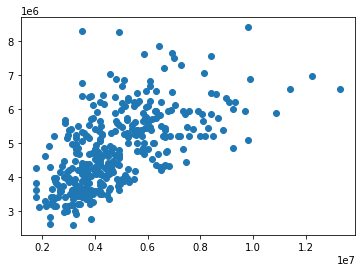

In [8]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)
plt.scatter(y_train, y_pred); plt.show()

### Regresion usando minimos cuadrados via QR

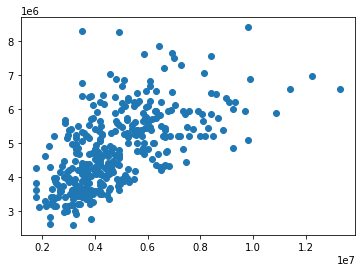

In [24]:
N,n = X_train.shape
A = np.hstack((np.ones((N,1)), X_train.copy()))
b = y_train.copy()
x, r = LS_viaQR(A,b)
my_y_pred = A.dot(x)
plt.scatter(y_train, my_y_pred); plt.show()

### Cross - validation

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
y = housing.pop('price')
X = housing[['area', 'bedrooms']]

clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)

C:\Users\msanc\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
